Routines for plotting the short-term performance statistics (e.g., RMSE/ACC/Spectra) of the emulator, averaged across different randomly initialized and trained emulators.

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yaml

In [2]:
# List all ensemble run_nums
run_nums = ['0000_BASE_seed_0', '0000_BASE_seed_10', '0000_BASE_seed_20',
            '0000_BASE_seed_30', '0000_BASE_seed_40']

# Config file path
config_file_path = "config/config_0000_BASE_seed_0.yaml"
with open(config_file_path, "r") as f:
    config = yaml.safe_load(f)

dataset_params = config["dataset_params"]
short_analysis_params = config["short_analysis_params"]
long_analysis_params = config["long_analysis_params"]

root_dir = dataset_params["root_dir"]

In [3]:
# Gather all of the data

rmse_u, rmse_v = [], []
acc_u, acc_v = [], []
spectra_pred, spectra_tar = [], []

for run_num in run_nums:
    analysis_dir = os.path.join(root_dir, run_num, "analysis")
    short_analysis_results_fp = os.path.join(analysis_dir, "emulate", "short_analysis.npz")

    data = np.load(short_analysis_results_fp)

    rmse_u.append(data["rmse_u"])
    rmse_v.append(data["rmse_v"])
    acc_u.append(data["acc_u"])
    acc_v.append(data["acc_v"])
    spectra_pred.append(data["spectra"])
    spectra_tar = data["spectra_tar"]
    wavenumbers = data["wavenumbers"]

    rmse_u_per_median = data["rmse_u_per_median"]
    rmse_u_per_uq = data["rmse_u_per_uq"]
    rmse_u_per_lq = data["rmse_u_per_lq"]
    rmse_v_per_lq = data["rmse_v_per_lq"]
    rmse_v_per_median = data["rmse_v_per_median"]
    rmse_v_per_uq = data["rmse_v_per_uq"]
    rmse_v_per_lq = data["rmse_v_per_lq"]

    acc_u_per_median = data["acc_u_per_median"]
    acc_u_per_uq = data["acc_u_per_uq"]
    acc_u_per_lq = data["acc_u_per_lq"]
    acc_v_per_lq = data["acc_v_per_lq"]
    acc_v_per_median = data["acc_v_per_median"]
    acc_v_per_uq = data["acc_v_per_uq"]
    acc_v_per_lq = data["acc_v_per_lq"]

rmse_u = np.concatenate(rmse_u, axis=0)
rmse_v = np.concatenate(rmse_v, axis=0)
acc_u = np.concatenate(acc_u, axis=0)
acc_v = np.concatenate(acc_v, axis=0)
spectra_pred = np.stack(spectra_pred, axis=0)  # shape (len(run_nums), leadtimes, wavenumbers)

print(f'rmse_u.shape: {rmse_u.shape}')
print(f'acc_u.shape: {acc_u.shape}')
print(f'spectra_pred.shape: {spectra_pred.shape}')

rmse_u.shape: (1000, 125)
acc_u.shape: (1000, 125)
spectra_pred.shape: (5, 125, 129)


Root-Mean-Square-Error

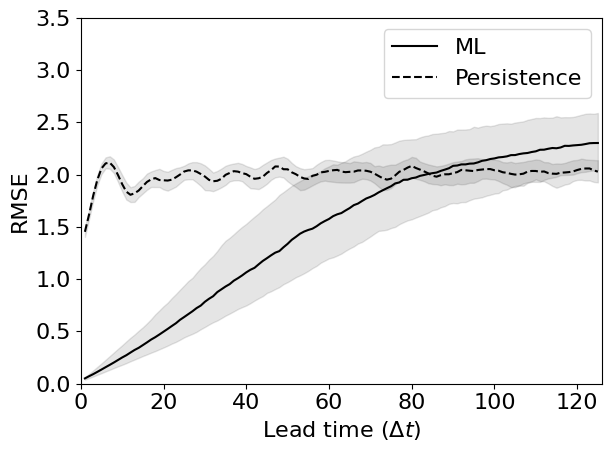

In [4]:
font = {'size'  : 16}
mpl.rc('font', **font)

rmse_u_median = np.quantile(rmse_u, 0.5, axis=0)
rmse_u_uq = np.quantile(rmse_u, 0.75, axis=0)
rmse_u_lq = np.quantile(rmse_u, 0.25, axis=0)

fig, ax = plt.subplots()
x = np.arange(1, len(rmse_u_median)+1) 
ax.plot(x, rmse_u_median, '-k', label='ML')
ax.fill_between(x, rmse_u_lq, rmse_u_uq, color='k', alpha=0.1)
ax.plot(x, rmse_u_per_median, '--k', label='Persistence')
ax.fill_between(x, rmse_u_per_lq, rmse_u_per_uq, color='k', alpha=0.1)
ax.set_ylabel('RMSE')
ax.set_xlabel(rf'Lead time ($\Delta t$)')
ax.set_ylim([0, 3.5])
ax.set_xlim([0, len(rmse_u_median)+1])

ax.legend()
plt.tight_layout()

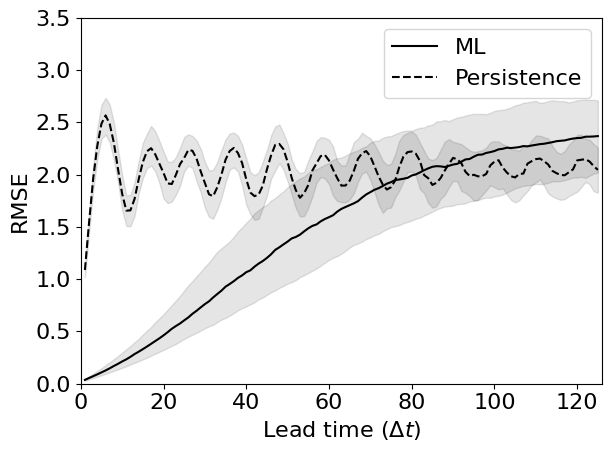

In [5]:
font = {'size'  : 16}
mpl.rc('font', **font)

rmse_v_median = np.quantile(rmse_v, 0.5, axis=0)
rmse_v_uq = np.quantile(rmse_v, 0.75, axis=0)
rmse_v_lq = np.quantile(rmse_v, 0.25, axis=0)

fig, ax = plt.subplots()
x = np.arange(1, len(rmse_v_median)+1) 
ax.plot(x, rmse_v_median, '-k', label='ML')
ax.fill_between(x, rmse_v_lq, rmse_v_uq, color='k', alpha=0.1)
ax.plot(x, rmse_v_per_median, '--k', label='Persistence')
ax.fill_between(x, rmse_v_per_lq, rmse_v_per_uq, color='k', alpha=0.1)
ax.set_ylabel('RMSE')
ax.set_xlabel(rf'Lead time ($\Delta t$)')
ax.set_ylim([0, 3.5])
ax.set_xlim([0, len(rmse_v_median)+1])

ax.legend()
plt.tight_layout()

Anomaly Correlation Coefficient

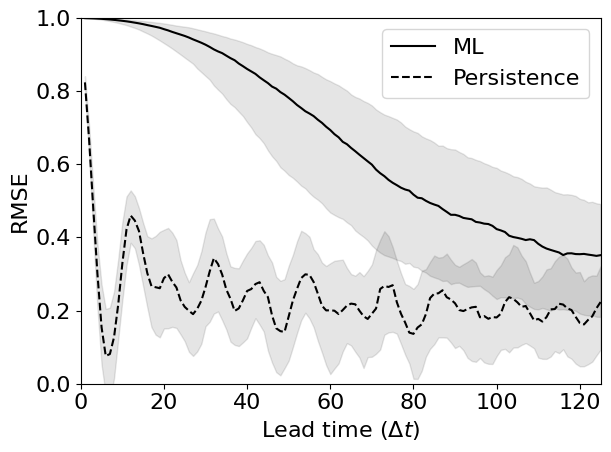

In [6]:
font = {'size'  : 16}
mpl.rc('font', **font)

acc_u_median = np.quantile(acc_u, 0.5, axis=0)
acc_u_uq = np.quantile(acc_u, 0.75, axis=0)
acc_u_lq = np.quantile(acc_u, 0.25, axis=0)

fig, ax = plt.subplots()
x = np.arange(1, len(acc_u_median)+1) 
ax.plot(x, acc_u_median, '-k', label='ML')
ax.fill_between(x, acc_u_lq, acc_u_uq, color='k', alpha=0.1)
ax.plot(x, acc_u_per_median, '--k', label='Persistence')
ax.fill_between(x, acc_u_per_lq, acc_u_per_uq, color='k', alpha=0.1)
ax.set_ylabel('RMSE')
ax.set_xlabel(rf'Lead time ($\Delta t$)')
ax.set_ylim([0, 1])
ax.set_xlim([0, len(acc_u_median)])

ax.legend()
plt.tight_layout()

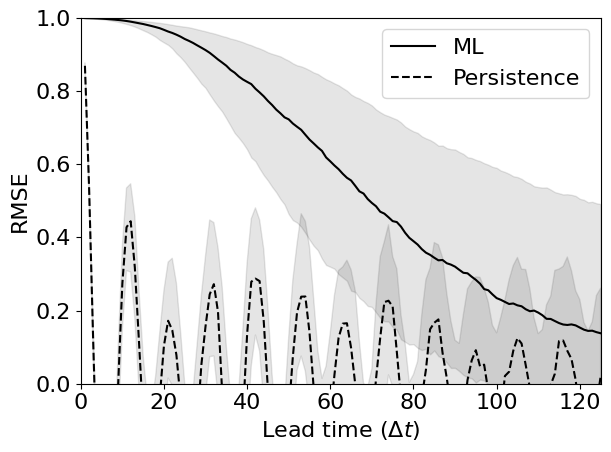

In [7]:
font = {'size'  : 16}
mpl.rc('font', **font)

acc_v_median = np.quantile(acc_v, 0.5, axis=0)
acc_v_uq = np.quantile(acc_v, 0.75, axis=0)
acc_v_lq = np.quantile(acc_v, 0.25, axis=0)

fig, ax = plt.subplots()
x = np.arange(1, len(acc_v_median)+1) 
ax.plot(x, acc_v_median, '-k', label='ML')
ax.fill_between(x, acc_v_lq, acc_u_uq, color='k', alpha=0.1)
ax.plot(x, acc_v_per_median, '--k', label='Persistence')
ax.fill_between(x, acc_v_per_lq, acc_v_per_uq, color='k', alpha=0.1)
ax.set_ylabel('RMSE')
ax.set_xlabel(rf'Lead time ($\Delta t$)')
ax.set_ylim([0, 1])
ax.set_xlim([0, len(acc_v_median)])

ax.legend()
plt.tight_layout()

Spectra

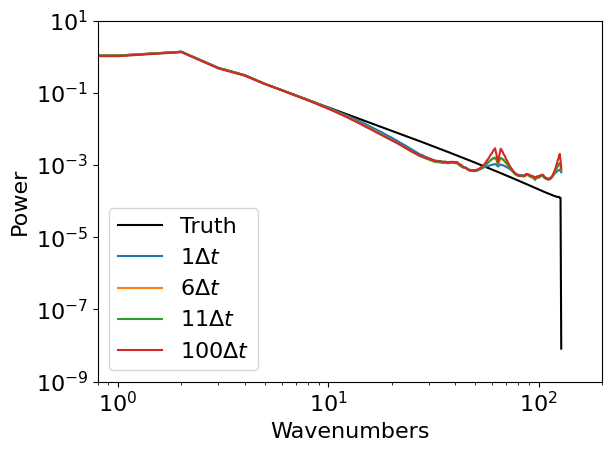

In [8]:
font = {'size'  : 16}
mpl.rc('font', **font)

spectra_pred_mean = np.mean(spectra_pred, axis=0)
spectra_tar_mean = np.mean(spectra_tar, axis=0)

leadtimes = short_analysis_params["spectra_leadtimes"]

fig, ax = plt.subplots()
ax.plot(wavenumbers, spectra_tar_mean, '-k', label='Truth')
for lead in leadtimes:
    spec = spectra_pred_mean[lead]

    label = rf'{lead+1}$\Delta t$' 

    ax.plot(wavenumbers, spec, label=label)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Wavenumbers')
    ax.set_ylabel('Power')
    ax.set_xlim([0.8, 200])
    ax.set_ylim([10**(-9), 10])
    ax.legend()

plt.tight_layout()